# Hong Kong Interbank Balance Plot

#### Imports

In [94]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json


#### Globals

In [105]:
START = '20220801'
END = '20220803'

#### Utility Functions

In [51]:
def url(Y, M, D):
    return (
        'https://www.hkma.gov.hk/eng/'
        'data-publications-and-research/data-and-statistics/'
        f'daily-monetary-statistics/{Y}/{M}/ms-{Y}{M}{D}/')


In [107]:
def interbank_balance(date):
    try:
        resp = requests.get(url(date[:4], date[4:6], date[6:]))
        print(f'fetching {date}')
        soup = BeautifulSoup(resp.content)
        table = soup.select_one(
            '#interbank-liquidity + div + div div.collapsibles-accordion-content div.template-table table')
        trs = table.select('tr')
        td = trs[1].select('td')[1]
        clean_text = td.text.replace('mn', '').replace('百萬', '').replace(',', '').strip()
        return float(clean_text)
    except (AttributeError, ConnectionError):
        return None


#### Tests

In [109]:
for date in ['20220601', '20220701', '20220801']:
    ib = interbank_balance(date)
    print(date, ib)


fetching 20220601
20220601 319990.0
fetching 20220701
20220701 None
fetching 20220801
20220801 165158.0


#### Fetch

In [110]:
with open('cache.json', 'r') as fp:
    data = json.load(fp)
dates = [str(d.date()).replace('-', '')
         for d in pd.date_range(START, END)]
data = {d: data.get(d) or interbank_balance(d)
        for d in dates}
with open('cache.json', 'w') as fp:
    json.dump(data, fp, indent=2)


fetching 20220801
fetching 20220802
fetching 20220803


#### Plot

In [111]:
data

{'20220801': 165158.0, '20220802': 153579.0, '20220803': 144765.0}

In [121]:
df = pd.Series(data.values(), index=data, name='hong-kong-interbank-balalnce')

<AxesSubplot:>

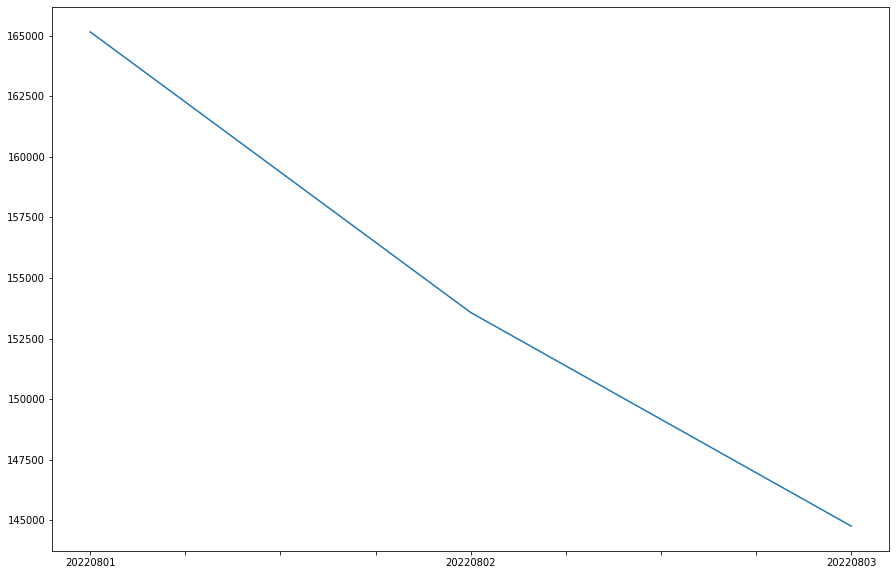

In [127]:
df.plot(figsize=(15,10))